In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/marcio/Documents/fish_analyzer_final.csv", index_col=0)
import ast
df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)
df['head'] = df['head'].apply(ast.literal_eval)



In [2]:
df["ant"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-4])
df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
df["ult"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-1])
#df["maximum"] = df["tail_coords"].apply(lambda x: max(tuple(zip(*x))[1][-1]))
#df["minimum"] = df["tail_coords"].apply(lambda x: min(tuple(zip(*x))[1]))

In [3]:
df.head(30)

,sequence,tail_coords,head,ant,pen,ult
1266,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18
1267,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58
1268,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75
1269,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19
1270,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0
1271,2,"((0, 0), (185, 0), (371, 0), (557, 0), (742, 20))","(685, 480)",0,0,20
1272,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(688, 480)",0,-19,19
1273,2,"((0, 0), (185, 0), (371, 0), (555, -21), (740,...","(690, 481)",0,-21,0
1274,2,"((0, 0), (185, 0), (371, 0), (557, 0), (741, 19))","(693, 481)",0,0,19
1275,2,"((0, 0), (185, 0), (370, -20), (554, -39), (73...","(695, 483)",0,-39,-58


In [4]:
from sklearn.linear_model import LinearRegression

def predict(d_frame):
    x = np.array([0, 1])
    y = np.array([d_frame.ant, d_frame.pen])

    lr = LinearRegression()
    lr.fit(x.reshape(-1, 1), y)

    #print(lr.predict([[3]]))

    #print(LinearRegression.predict([[3]]))
    
    #model_regression = LinearRegression().fit(x, y)
    return lr.predict([[2]])[0]


df["predicted"] = np.NaN
df["predicted"] = df.apply(predict, axis=1)

In [5]:
df

,sequence,tail_coords,head,ant,pen,ult,predicted
1266,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0
1267,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58,0.0
1268,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75,40.0
1269,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19,-40.0
1270,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0,0.0
...,...,...,...,...,...,...,...
5695,1516,"((0, 0), (185, 0), (364, -46), (544, -90), (72...","(798, 834)",0,-90,-132,-180.0
5696,1516,"((0, 0), (185, 0), (370, -14), (553, -40), (72...","(802, 834)",0,-40,-109,-80.0
5697,1516,"((0, 0), (185, 0), (371, 0), (554, -29), (733,...","(805, 834)",0,-29,-82,-58.0
5698,1516,"((0, 0), (186, 0), (369, -28), (554, -48), (73...","(809, 834)",0,-48,-101,-96.0


In [6]:
df["position"] = None

In [7]:
df["position"] = df.apply(lambda x: "up" if x["ult"] > x["predicted"] else x["position"], axis=1)
df["position"] = df.apply(lambda x: "down" if x["ult"] < x["predicted"] else x["position"], axis=1)



In [8]:
df.tail(30)

,sequence,tail_coords,head,ant,pen,ult,predicted,position
5648,1509,"((0, 0), (184, 0), (368, -10), (550, -47), (73...","(648, 697)",0,-47,-36,-94.0,up
5649,1509,"((0, 0), (184, 0), (369, -9), (552, -43), (723...","(653, 701)",0,-43,-117,-86.0,down
5650,1509,"((0, 0), (185, 0), (369, 11), (553, 22), (734,...","(657, 706)",0,22,-19,44.0,down
5651,1509,"((0, 0), (186, 0), (372, 0), (554, 31), (740, ...","(662, 710)",0,31,42,62.0,down
5652,1509,"((0, 0), (185, 0), (370, 12), (556, 11), (736,...","(667, 714)",0,11,55,22.0,up
5653,1509,"((0, 0), (184, 0), (369, -10), (551, -43), (73...","(672, 717)",0,-43,-62,-86.0,up
5654,1509,"((0, 0), (184, 0), (368, 9), (552, 9), (727, -...","(676, 722)",0,9,-50,18.0,down
5655,1509,"((0, 0), (185, 0), (370, 0), (554, 20), (740, ...","(680, 726)",0,20,29,40.0,down
5656,1509,"((0, 0), (185, 0), (371, 11), (557, 22), (733,...","(684, 729)",0,22,76,44.0,up
5657,1509,"((0, 0), (185, 0), (371, 0), (556, -12), (739,...","(689, 733)",0,-12,20,-24.0,up


In [9]:
df["beating"] = np.NAN

sequence_number = 1
for i in range(0, len(df)):
    now = df.iloc[i]["position"]    
    if i == 0:        
        previous = now
        df.iloc[i, 8] = sequence_number      
        continue
    if (now != previous) and (now != None):
        sequence_number = sequence_number + 1        
        df.iloc[i, 8] = sequence_number
        previous = now
        
    else:
        df.iloc[i, 8] = sequence_number
        previous = now
        
      
        
        

        
        
    
        




In [10]:
df.head(30)

,sequence,tail_coords,head,ant,pen,ult,predicted,position,beating
1266,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0,up,1.0
1267,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58,0.0,up,1.0
1268,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75,40.0,up,1.0
1269,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19,-40.0,up,1.0
1270,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0,0.0,None,1.0
1271,2,"((0, 0), (185, 0), (371, 0), (557, 0), (742, 20))","(685, 480)",0,0,20,0.0,up,2.0
1272,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(688, 480)",0,-19,19,-38.0,up,2.0
1273,2,"((0, 0), (185, 0), (371, 0), (555, -21), (740,...","(690, 481)",0,-21,0,-42.0,up,2.0
1274,2,"((0, 0), (185, 0), (371, 0), (557, 0), (741, 19))","(693, 481)",0,0,19,0.0,up,2.0
1275,2,"((0, 0), (185, 0), (370, -20), (554, -39), (73...","(695, 483)",0,-39,-58,-78.0,up,2.0


In [11]:
df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()
for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    print(the_idxs)
    step = 0
    cycle_number = 1   
    for i in the_idxs:
        now = df.loc[i, "position"]
        print("the now")
        print(now)   
        if i == the_idxs[0]:        
            previous = now
            df.loc[i, "cycle"] = cycle_number            
            continue
        if (now == previous):        
            df.loc[i, "cycle"] = cycle_number
            previous = now
        else:
            step=step+1
            if step==1:
                df.loc[i, "cycle"] = cycle_number
                previous = now
            else:
                cycle_number=cycle_number+1            
                df.loc[i, "cycle"] = cycle_number
                previous = now
                step=0
                
            
    
    
    
    

2
Int64Index([1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275], dtype='int64')
the now
up
the now
up
the now
up
the now
up
the now
None
the now
up
the now
up
the now
up
the now
up
the now
up
13
Int64Index([1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316,
            1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325],
           dtype='int64')
the now
down
the now
down
the now
up
the now
down
the now
down
the now
down
the now
down
the now
up
the now
up
the now
down
the now
down
the now
down
the now
down
the now
up
the now
down
the now
down
the now
down
the now
down
the now
down
the now
down
48
Int64Index([1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385], dtype='int64')
the now
up
the now
down
the now
down
the now
down
the now
up
the now
up
the now
down
the now
down
the now
up
the now
up
the now
up
49
Int64Index([1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397,
            1398, 1399, 1400, 1401, 1402, 1403, 1404],
        

In [12]:
df.head(30)

,sequence,tail_coords,head,ant,pen,ult,predicted,position,beating,cycle
1266,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0,up,1.0,1.0
1267,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58,0.0,up,1.0,1.0
1268,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75,40.0,up,1.0,1.0
1269,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19,-40.0,up,1.0,1.0
1270,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0,0.0,None,1.0,1.0
1271,2,"((0, 0), (185, 0), (371, 0), (557, 0), (742, 20))","(685, 480)",0,0,20,0.0,up,2.0,2.0
1272,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(688, 480)",0,-19,19,-38.0,up,2.0,2.0
1273,2,"((0, 0), (185, 0), (371, 0), (555, -21), (740,...","(690, 481)",0,-21,0,-42.0,up,2.0,2.0
1274,2,"((0, 0), (185, 0), (371, 0), (557, 0), (741, 19))","(693, 481)",0,0,19,0.0,up,2.0,2.0
1275,2,"((0, 0), (185, 0), (370, -20), (554, -39), (73...","(695, 483)",0,-39,-58,-78.0,up,2.0,2.0


In [13]:
#df["velocity"] = np.NaN

temp = df.groupby(["sequence", "cycle"])["tail_coords"].apply(lambda grp: 1/grp.count())
temp = temp.reset_index()

#df["velocity"] = temp["cycle"]

temp = temp.rename(columns={"tail_coords":"speed"})
        
temp      



,sequence,cycle,speed
0,2,1.0,0.200000
1,2,2.0,0.200000
2,13,1.0,0.333333
3,13,2.0,0.166667
4,13,3.0,0.200000
...,...,...,...
396,1509,4.0,0.142857
397,1509,5.0,0.250000
398,1516,1.0,0.333333
399,1516,2.0,0.200000


In [14]:
merged_speed = df.merge(temp, on=["sequence", "cycle"])

In [15]:
merged_speed.head(30)

,sequence,tail_coords,head,ant,pen,ult,predicted,position,beating,cycle,speed
0,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0,up,1.0,1.0,0.200000
1,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58,0.0,up,1.0,1.0,0.200000
2,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75,40.0,up,1.0,1.0,0.200000
3,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19,-40.0,up,1.0,1.0,0.200000
4,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0,0.0,None,1.0,1.0,0.200000
5,2,"((0, 0), (185, 0), (371, 0), (557, 0), (742, 20))","(685, 480)",0,0,20,0.0,up,2.0,2.0,0.200000
6,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(688, 480)",0,-19,19,-38.0,up,2.0,2.0,0.200000
7,2,"((0, 0), (185, 0), (371, 0), (555, -21), (740,...","(690, 481)",0,-21,0,-42.0,up,2.0,2.0,0.200000
8,2,"((0, 0), (185, 0), (371, 0), (557, 0), (741, 19))","(693, 481)",0,0,19,0.0,up,2.0,2.0,0.200000
9,2,"((0, 0), (185, 0), (370, -20), (554, -39), (73...","(695, 483)",0,-39,-58,-78.0,up,2.0,2.0,0.200000


In [16]:

import math
temp = merged_speed.groupby(["sequence", "cycle"])
#temp = temp.reset_index()
the_firsts = temp.head(1)
the_lasts = temp.tail(1)
the_firsts["distance"] = np.NaN

for i in range(0, len(the_firsts)):
    #the_idxs = df.loc[df["sequence"] == i].index
    first_com = the_firsts.iloc[i, 2]
    last_com = the_lasts.iloc[i, 2]
    print(first_com)
    print(last_com)
    the_firsts.iloc[i, 11] = math.hypot((first_com[0] - last_com[0]), (first_com[1] - last_com[1]))
      
    
    



(670, 475)
(682, 478)
(685, 480)
(695, 483)
(764, 564)
(769, 573)
(771, 578)
(777, 597)
(777, 600)
(779, 613)
(779, 616)
(779, 634)
(735, 713)
(726, 719)
(724, 723)
(715, 729)
(713, 733)
(709, 739)
(707, 745)
(700, 756)
(699, 758)
(692, 769)
(690, 771)
(687, 776)
(686, 778)
(686, 782)
(770, 803)
(789, 784)
(792, 782)
(805, 771)
(806, 768)
(816, 760)
(818, 758)
(826, 749)
(830, 663)
(830, 629)
(831, 626)
(833, 614)
(791, 544)
(764, 544)
(761, 543)
(746, 542)
(694, 550)
(674, 550)
(671, 549)
(659, 552)
(655, 552)
(651, 552)
(641, 576)
(638, 580)
(635, 584)
(622, 601)
(621, 605)
(612, 613)
(610, 615)
(599, 626)
(597, 629)
(587, 642)
(584, 646)
(575, 656)
(573, 661)
(563, 674)
(561, 678)
(551, 694)
(551, 702)
(547, 712)
(547, 716)
(545, 729)
(544, 732)
(540, 749)
(539, 751)
(539, 751)
(611, 811)
(623, 808)
(626, 808)
(641, 804)
(645, 802)
(648, 802)
(660, 789)
(665, 786)
(669, 782)
(684, 771)
(688, 768)
(701, 758)
(706, 755)
(716, 747)
(719, 744)
(734, 734)
(737, 731)
(737, 731)
(747, 730)

<ipython-input-16-354ba3d2fd04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_firsts["distance"] = np.NaN
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [17]:
merged_speed

,sequence,tail_coords,head,ant,pen,ult,predicted,position,beating,cycle,speed
0,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0,up,1.0,1.0,0.2
1,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58,0.0,up,1.0,1.0,0.2
2,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75,40.0,up,1.0,1.0,0.2
3,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19,-40.0,up,1.0,1.0,0.2
4,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0,0.0,None,1.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...
1602,1516,"((0, 0), (185, 0), (364, -46), (544, -90), (72...","(798, 834)",0,-90,-132,-180.0,up,692.0,2.0,0.2
1603,1516,"((0, 0), (185, 0), (370, -14), (553, -40), (72...","(802, 834)",0,-40,-109,-80.0,down,693.0,2.0,0.2
1604,1516,"((0, 0), (185, 0), (371, 0), (554, -29), (733,...","(805, 834)",0,-29,-82,-58.0,down,693.0,2.0,0.2
1605,1516,"((0, 0), (186, 0), (369, -28), (554, -48), (73...","(809, 834)",0,-48,-101,-96.0,down,693.0,2.0,0.2


In [18]:
temp_max = merged_speed.groupby(["sequence", "cycle"])["ult"].max()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"ult":"ult_max"})

temp_min = merged_speed.groupby(["sequence", "cycle"])["ult"].min()
temp_min = temp_min.reset_index()
temp_min = temp_min.rename(columns={"ult":"ult_min"})


In [19]:
temp_max

,sequence,cycle,ult_max
0,2,1.0,75
1,2,2.0,20
2,13,1.0,88
3,13,2.0,99
4,13,3.0,68
...,...,...,...
396,1509,4.0,136
397,1509,5.0,50
398,1516,1.0,0
399,1516,2.0,9


In [20]:
merged_speed = merged_speed.merge(temp_max, on=["sequence", "cycle"])
merged_speed = merged_speed.merge(temp_min, on=["sequence", "cycle"])

merged_speed

,sequence,tail_coords,head,ant,pen,ult,predicted,position,beating,cycle,speed,ult_max,ult_min
0,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0,up,1.0,1.0,0.2,75,-19
1,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58,0.0,up,1.0,1.0,0.2,75,-19
2,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75,40.0,up,1.0,1.0,0.2,75,-19
3,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19,-40.0,up,1.0,1.0,0.2,75,-19
4,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0,0.0,None,1.0,1.0,0.2,75,-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1516,"((0, 0), (185, 0), (364, -46), (544, -90), (72...","(798, 834)",0,-90,-132,-180.0,up,692.0,2.0,0.2,9,-132
1603,1516,"((0, 0), (185, 0), (370, -14), (553, -40), (72...","(802, 834)",0,-40,-109,-80.0,down,693.0,2.0,0.2,9,-132
1604,1516,"((0, 0), (185, 0), (371, 0), (554, -29), (733,...","(805, 834)",0,-29,-82,-58.0,down,693.0,2.0,0.2,9,-132
1605,1516,"((0, 0), (186, 0), (369, -28), (554, -48), (73...","(809, 834)",0,-48,-101,-96.0,down,693.0,2.0,0.2,9,-132


In [21]:
merged_speed["amplitude"] = abs(merged_speed["ult_max"]-merged_speed["ult_min"])

In [22]:
merged_speed

,sequence,tail_coords,head,ant,pen,ult,predicted,position,beating,cycle,speed,ult_max,ult_min,amplitude
0,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0,up,1.0,1.0,0.2,75,-19,94
1,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58,0.0,up,1.0,1.0,0.2,75,-19,94
2,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75,40.0,up,1.0,1.0,0.2,75,-19,94
3,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19,-40.0,up,1.0,1.0,0.2,75,-19,94
4,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0,0.0,None,1.0,1.0,0.2,75,-19,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1516,"((0, 0), (185, 0), (364, -46), (544, -90), (72...","(798, 834)",0,-90,-132,-180.0,up,692.0,2.0,0.2,9,-132,141
1603,1516,"((0, 0), (185, 0), (370, -14), (553, -40), (72...","(802, 834)",0,-40,-109,-80.0,down,693.0,2.0,0.2,9,-132,141
1604,1516,"((0, 0), (185, 0), (371, 0), (554, -29), (733,...","(805, 834)",0,-29,-82,-58.0,down,693.0,2.0,0.2,9,-132,141
1605,1516,"((0, 0), (186, 0), (369, -28), (554, -48), (73...","(809, 834)",0,-48,-101,-96.0,down,693.0,2.0,0.2,9,-132,141


In [23]:
merged_speed["amplitude/frequency"] = merged_speed["amplitude"]/merged_speed["speed"]
merged_speed

,sequence,tail_coords,head,ant,pen,ult,predicted,position,beating,cycle,speed,ult_max,ult_min,amplitude,amplitude/frequency
0,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0,up,1.0,1.0,0.2,75,-19,94,470.0
1,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58,0.0,up,1.0,1.0,0.2,75,-19,94,470.0
2,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75,40.0,up,1.0,1.0,0.2,75,-19,94,470.0
3,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19,-40.0,up,1.0,1.0,0.2,75,-19,94,470.0
4,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0,0.0,None,1.0,1.0,0.2,75,-19,94,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1516,"((0, 0), (185, 0), (364, -46), (544, -90), (72...","(798, 834)",0,-90,-132,-180.0,up,692.0,2.0,0.2,9,-132,141,705.0
1603,1516,"((0, 0), (185, 0), (370, -14), (553, -40), (72...","(802, 834)",0,-40,-109,-80.0,down,693.0,2.0,0.2,9,-132,141,705.0
1604,1516,"((0, 0), (185, 0), (371, 0), (554, -29), (733,...","(805, 834)",0,-29,-82,-58.0,down,693.0,2.0,0.2,9,-132,141,705.0
1605,1516,"((0, 0), (186, 0), (369, -28), (554, -48), (73...","(809, 834)",0,-48,-101,-96.0,down,693.0,2.0,0.2,9,-132,141,705.0


In [24]:
the_firsts = the_firsts[["sequence", "cycle", "distance"]]
the_firsts

,sequence,cycle,distance
0,2,1.0,12.369317
5,2,2.0,10.440307
10,13,1.0,10.295630
13,13,2.0,19.924859
19,13,3.0,13.152946
...,...,...,...
1587,1509,4.0,25.495098
1594,1509,5.0,10.630146
1598,1516,1.0,8.544004
1601,1516,2.0,15.000000


In [25]:
merged_speed = merged_speed.merge(the_firsts, on=["sequence", "cycle"])

In [26]:
merged_speed

,sequence,tail_coords,head,ant,pen,ult,predicted,position,beating,cycle,speed,ult_max,ult_min,amplitude,amplitude/frequency,distance
0,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0,up,1.0,1.0,0.2,75,-19,94,470.0,12.369317
1,2,"((0, 0), (185, 0), (370, 0), (556, 0), (731, 58))","(673, 475)",0,0,58,0.0,up,1.0,1.0,0.2,75,-19,94,470.0,12.369317
2,2,"((0, 0), (185, 0), (369, 19), (555, 20), (731,...","(676, 476)",0,20,75,40.0,up,1.0,1.0,0.2,75,-19,94,470.0,12.369317
3,2,"((0, 0), (184, 0), (369, 0), (554, -20), (738,...","(679, 477)",0,-20,-19,-40.0,up,1.0,1.0,0.2,75,-19,94,470.0,12.369317
4,2,"((0, 0), (185, 0), (370, 0), (555, 0), (740, 0))","(682, 478)",0,0,0,0.0,None,1.0,1.0,0.2,75,-19,94,470.0,12.369317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,1516,"((0, 0), (185, 0), (364, -46), (544, -90), (72...","(798, 834)",0,-90,-132,-180.0,up,692.0,2.0,0.2,9,-132,141,705.0,15.000000
1603,1516,"((0, 0), (185, 0), (370, -14), (553, -40), (72...","(802, 834)",0,-40,-109,-80.0,down,693.0,2.0,0.2,9,-132,141,705.0,15.000000
1604,1516,"((0, 0), (185, 0), (371, 0), (554, -29), (733,...","(805, 834)",0,-29,-82,-58.0,down,693.0,2.0,0.2,9,-132,141,705.0,15.000000
1605,1516,"((0, 0), (186, 0), (369, -28), (554, -48), (73...","(809, 834)",0,-48,-101,-96.0,down,693.0,2.0,0.2,9,-132,141,705.0,15.000000


In [27]:
temp = merged_speed.groupby(["sequence", "cycle"])["tail_coords"].apply(lambda grp: grp.count())
temp = temp.reset_index()
temp = temp.rename(columns={"tail_coords":"counts"})
        
merged_speed = merged_speed.merge(temp, on=["sequence", "cycle"])

merged_speed["speed_movement"] = merged_speed["distance"] / merged_speed["counts"] 

In [28]:
graphs = merged_speed.groupby(["sequence", "cycle"])
to_graphs = graphs.head(1)
to_graphs


,sequence,tail_coords,head,ant,pen,ult,predicted,position,beating,cycle,speed,ult_max,ult_min,amplitude,amplitude/frequency,distance,counts,speed_movement
0,2,"((0, 0), (185, 0), (370, -21), (556, -19), (73...","(670, 475)",0,-19,18,-38.0,up,1.0,1.0,0.200000,75,-19,94,470.0,12.369317,5,2.473863
5,2,"((0, 0), (185, 0), (371, 0), (557, 0), (742, 20))","(685, 480)",0,0,20,0.0,up,2.0,2.0,0.200000,20,-58,78,390.0,10.440307,5,2.088061
10,13,"((0, 0), (185, 0), (367, 40), (549, 71), (735,...","(764, 564)",0,71,83,142.0,down,3.0,1.0,0.333333,88,53,35,105.0,10.295630,3,3.431877
13,13,"((0, 0), (185, 0), (366, 41), (551, 31), (734,...","(771, 578)",0,31,-4,62.0,down,5.0,2.0,0.166667,99,-39,138,828.0,19.924859,6,3.320810
19,13,"((0, 0), (185, 0), (370, 0), (555, 0), (740, -...","(777, 600)",0,0,-19,0.0,down,7.0,3.0,0.200000,68,-19,87,435.0,13.152946,5,2.630589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,1509,"((0, 0), (185, 0), (370, -11), (556, -21), (73...","(692, 735)",0,-21,-58,-42.0,down,688.0,4.0,0.142857,136,-58,194,1358.0,25.495098,7,3.642157
1594,1509,"((0, 0), (185, 0), (370, 0), (556, -13), (737,...","(714, 755)",0,-13,-53,-26.0,down,690.0,5.0,0.250000,50,-86,136,544.0,10.630146,4,2.657536
1598,1516,"((0, 0), (185, 0), (368, -24), (550, -58), (73...","(781, 831)",0,-58,-46,-116.0,up,691.0,1.0,0.333333,0,-74,74,222.0,8.544004,3,2.848001
1601,1516,"((0, 0), (185, 0), (370, -11), (556, -23), (73...","(794, 834)",0,-23,9,-46.0,up,692.0,2.0,0.200000,9,-132,141,705.0,15.000000,5,3.000000


<AxesSubplot:>

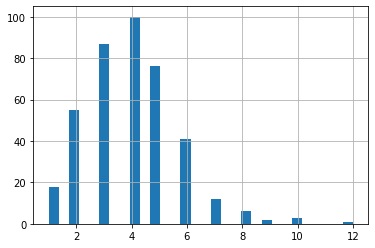

In [29]:
#sorted = to_graphs.sort_values(by=['distance'], ascending=False)
#len(sorted)
#hist = to_graphs["counts"].hist(bins=30)

filtered_to_graphs = to_graphs.loc[(to_graphs["counts"] < 7) & (1==1)]
filtered_to_graphs = filtered_to_graphs.loc[(filtered_to_graphs["amplitude"] > 5) & (filtered_to_graphs["amplitude"] < 240)]
#filtered_to_graphs = filtered_to_graphs.loc[(filtered_to_graphs["amplitude/frequency"] < 400) & (1==1)]
filtered_to_graphs = filtered_to_graphs.loc[(filtered_to_graphs["distance"] > 10) & (to_graphs["distance"] < 30)]


#filtered_to_graphs = filtered_to_graphs.loc[(filtered_to_graphs["amplitude"] < 300)]

filtered_to_graphs = to_graphs

filtered_to_graphs["counts"].hist(bins=30)


<AxesSubplot:>

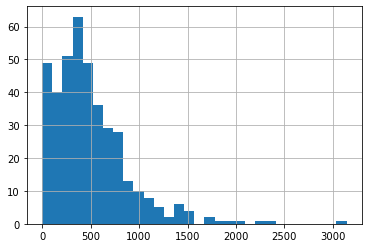

In [30]:
filtered_to_graphs["amplitude/frequency"].hist(bins=30)


In [31]:
import seaborn as sns

In [32]:
to_graphs = filtered_to_graphs

3.83530177642522e-64
Decimal Representation: 0.000000000000000000000000000000


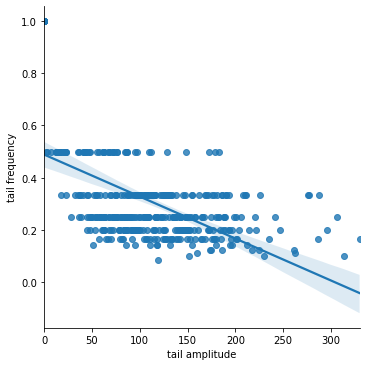

In [33]:
from scipy.stats import spearmanr

ax = sns.lmplot(data=to_graphs, x="amplitude", y="speed")
ax.set(xlabel='tail amplitude', ylabel='tail frequency')

r, pvalue = spearmanr(merged_speed["amplitude"], merged_speed["speed"])
print(pvalue)
print(f"Decimal Representation: {pvalue:.30f}")


2.663187486181345e-70
Decimal Representation: 0.000000000000000000000000000000


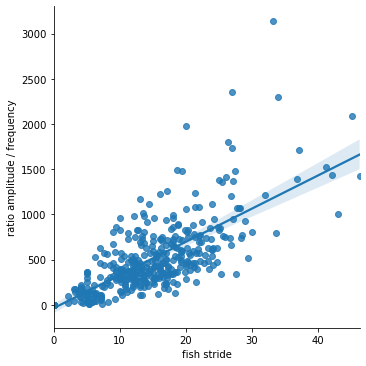

In [34]:
from scipy.stats import spearmanr

ax = sns.lmplot(data=to_graphs, x="distance", y="amplitude/frequency")
r, pvalue = spearmanr(to_graphs["distance"], to_graphs["amplitude/frequency"])
ax.set(xlabel='fish stride', ylabel='ratio amplitude / frequency')

print(pvalue)
print(f"Decimal Representation: {pvalue:.30f}")




3.291673702574839e-29
Decimal Representation: 0.000000000000000000000000000033


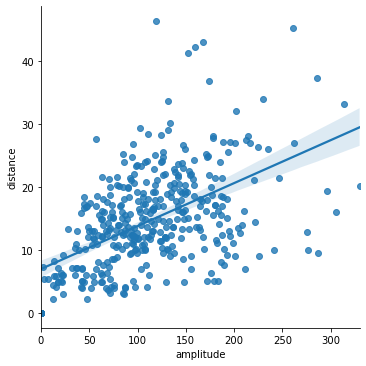

In [35]:
sns.lmplot(data=to_graphs, x="amplitude", y="distance")
r, pvalue = spearmanr(to_graphs["amplitude"], to_graphs["distance"])
print(pvalue)
print(f"Decimal Representation: {pvalue:.30f}")


8.308519612095439e-103
Decimal Representation: 0.000000000000000000000000000000


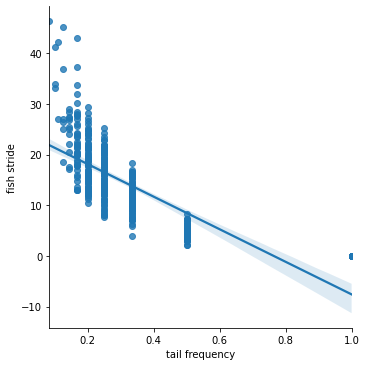

In [36]:
ax = sns.lmplot(data=to_graphs, x="speed", y="distance")
r, pvalue = spearmanr(to_graphs["speed"], to_graphs["distance"])
ax.set(xlabel='tail frequency', ylabel='fish stride')

print(pvalue)
print(f"Decimal Representation: {pvalue:.30f}")


2.663187486181345e-70
Decimal Representation: 0.000000000000000000000000000000


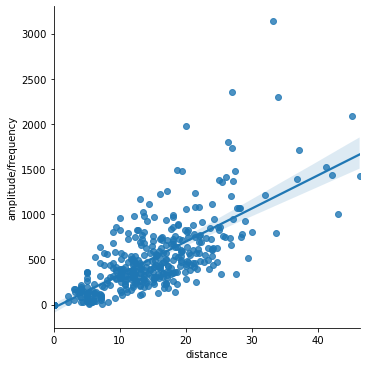

In [40]:
ax = sns.lmplot(data=to_graphs, x="distance", y="amplitude/frequency")
r, pvalue = spearmanr(to_graphs["distance"], to_graphs["amplitude/frequency"])
#ax.set(xlabel='tail frequency', ylabel='fish stride')

print(pvalue)
print(f"Decimal Representation: {pvalue:.30f}")